# PS 88 Project Part 3 - Due 5/11 at 6:00pm

The goal of the final part of the project is to extend the analysis of one of the replication papers, or any other data set we have worked on in any of the labs or class examples. (If you want to work with a different data set that will probably be fine too, but check with me first.) 

Regardless of dataset you start with, the goal is to provide new theoretical insights by introducing some new data and running some new analysis.

The parameters here will be much looser; the only concrete requirements are that you (1) do at least one merging of different data frames, and (2) run at least two new regressions and create at least two visualizations (histograms, scatterplots, line plots, etc), some of which involve the "new" variables you merged in.

On the second part, here are some ideas of what doing new analysis might entail, some of which will work better than others depending on what data you start with:
- Run the analysis with a different dependent variable
- Run the analysis with a different independent variable
- Run the analysis on a subset of the data, where we might expect the causal effect to be different
- Add a control variable to the regression that might help control for some confounding variable

Over the course of this week I'll be adding some pointers to potentially useful data sources and tips for merging them properly.

In terms of formatting, add as many code/mardown cells as you need below. We provide some general guidance about how much writing/coding to do, but you don't necesarily need to worry if yours is a bit shorter or longer. Feel free to ask if you need any guidance.

A final hint: you may want to complete step 1 last, or at least after you have done the main analysis in steps 2 and 3.



## Step 0: Loading the original data

Regardless of what data you start with, you will want to move it into the folder that this notebook lives on in datahub. To do this:
- Go to https://datahub.berkeley.edu/. If needed, hit the "Launch Server" button.
- Go to the "PS88-SP23-Public" folder, and then navigate to the appropriate folder. E.g., if you are doing the Sheve and Stasavage paper, go to the replications/ss2023 folder. 
- Tick the box next to the data file, and then click the download button
- Go back to the "PS88-SP23-Public" folder, and then to the "ProjectPart3" folder
- Upload the file you downloaded
- Other files you need to include should go in this folder as well

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
python -m pip install "jupyter_server>=2.0.0"

SyntaxError: invalid syntax (1885539017.py, line 9)

In [3]:
hall = pd.read_csv("data/halls.csv")
hall

,Unnamed: 0,state,dist,year,dem,redist1,redist2,vote_P0,cand_dwnom0,prim_total0,...,qual_D,qual_R,qual,winner_hall_snyder_score,wnom1,lag_wnom1,abs_lag_wnom,abs_dw_lag,winner_female,winner_share
0,0,AL,1,1984.0,1.0,98,103,0.454907,-0.073972,9258.0,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
1,1,AL,1,2002.0,0.0,108,1000,0.375583,0.180372,104000.0,...,1,0,0.0,0.138252,0.615196,NaN,NaN,NaN,0.0,0.578606
2,2,AL,2,1992.0,0.0,103,108,0.582899,0.128862,5000.0,...,1,0,0.0,0.128862,0.547890,NaN,NaN,NaN,0.0,0.219780
3,3,AL,2,1992.0,1.0,103,108,0.428863,-0.312309,70849.0,...,1,0,1.0,0.051086,0.547890,NaN,NaN,NaN,0.0,0.419912
4,4,AL,2,2008.0,0.0,108,1000,0.531126,0.225109,55000.0,...,1,1,1.0,0.225109,0.082957,0.637359,0.637359,0.552,0.0,0.873016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,499,WV,1,1992.0,1.0,103,108,0.384997,-0.170781,81074.0,...,0,0,0.0,-0.067638,-0.275327,NaN,NaN,NaN,0.0,0.626384
500,500,WV,1,2010.0,1.0,108,1000,0.440938,-0.067638,266793.0,...,1,1,1.0,0.140244,0.349566,-0.569978,0.569978,0.286,0.0,0.075699
501,501,WV,2,1980.0,1.0,93,98,0.419902,-0.326184,11350.0,...,1,0,1.0,-0.326184,0.228743,NaN,NaN,0.351,0.0,0.380235
502,502,WY,1,1994.0,0.0,51,1000,0.387491,0.184238,18899.0,...,0,1,1.0,0.184238,0.772233,0.643263,0.643263,0.413,1.0,0.843743


In [4]:
congress = pd.read_csv("data/congress.csv")
congress

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numPassH,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,3.0,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,2.0,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,1.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,WI.8,0.3,4.400000,714299.0,3.500000,38.5,286922.0,5.100000,94.800000,89.800000,...,1.0,1.0,7.692308,113.0,R,201.0,234.0,0.0,0.358657,39.419606
9409,WV.1,0.2,5.600000,616974.0,1.500000,45.3,244778.0,10.300000,89.700000,82.700000,...,2.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.165812,29.278239
9410,WV.2,0.2,4.900000,622552.0,1.800000,49.7,249532.0,8.100000,92.000000,85.400000,...,1.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.002095,32.443945
9411,WV.3,0.2,4.800000,614093.0,1.000000,42.9,247080.0,11.800000,88.200000,79.900000,...,0.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.562337,21.610861


## Step 1: Theory

What is the theoretical question or causal relationship you aim to explore with your analysis? What relationships did you expect to see in the data? (5-10 sentences)

Draft: We want to see how income level of constituents in a district affect an extreme candidate's performance. 

## Step 2: Merging

Load up the data files you plan to use, and merge them together. Explain what you are doing at each step of the process. Do some checks with `.shape` to see that the merge works as expected. Depending on what you are working with, this will probably take around 10 lines of code, and 1-2 sentences explaining each step.

Each row in the following data tables corresponds to one congressional district in the US. The following variables will be used in our analysis: 

 under10k            9201 non-null   float64
 8   over10k             9201 non-null   float64
 9   over15k             9201 non-null   float64
 10  over25k             9201 non-null   float64
 11  over35k             9201 non-null   float64
 12  over50k             9201 non-null   float64
 13  over75k             9201 non-null   float64
 14  over100k            9201 non-null   float64
 15  over150k            9201 non-null   float64
 16  over200k            9201 non-null   float64
  meanIncome          7008 non-null   float64
  medianIncom
under10k = the percent of a district that lives with an income that is under 10k per year
year = the year of the election 
cd = the congressional district 

In [5]:
congress = congress.drop_duplicates(subset=["state", "cd", "congNum"])
congress

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numPassH,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,3.0,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,2.0,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,1.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,WI.8,0.3,4.400000,714299.0,3.500000,38.5,286922.0,5.100000,94.800000,89.800000,...,1.0,1.0,7.692308,113.0,R,201.0,234.0,0.0,0.358657,39.419606
9409,WV.1,0.2,5.600000,616974.0,1.500000,45.3,244778.0,10.300000,89.700000,82.700000,...,2.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.165812,29.278239
9410,WV.2,0.2,4.900000,622552.0,1.800000,49.7,249532.0,8.100000,92.000000,85.400000,...,1.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.002095,32.443945
9411,WV.3,0.2,4.800000,614093.0,1.000000,42.9,247080.0,11.800000,88.200000,79.900000,...,0.0,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.562337,21.610861


In [6]:
congress.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9301 entries, 0 to 9412
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stateDist           9301 non-null   object 
 1   abroadPrcnt         7008 non-null   float64
 2   recentArrivalPrcnt  9201 non-null   float64
 3   totalPopBirthPlace  9201 non-null   float64
 4   prcntForeignBorn    9201 non-null   float64
 5   prcntExAliens       4817 non-null   float64
 6   totalHouseholds     9201 non-null   float64
 7   under10k            9201 non-null   float64
 8   over10k             9201 non-null   float64
 9   over15k             9201 non-null   float64
 10  over25k             9201 non-null   float64
 11  over35k             9201 non-null   float64
 12  over50k             9201 non-null   float64
 13  over75k             9201 non-null   float64
 14  over100k            9201 non-null   float64
 15  over150k            9201 non-null   float64
 16  over20

In [7]:
year = 1786 + 2 * congress["congNum"]
year

0       1972.0
1       1972.0
2       1972.0
3       1972.0
4       1972.0
         ...  
9408    2012.0
9409    2012.0
9410    2012.0
9411    2012.0
9412    2012.0
Name: congNum, Length: 9301, dtype: float64

In [8]:
congress["year"] = year
congress

/tmp/ipykernel_74/220173941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  congress["year"] = year


,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm,year
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666,1972.0
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437,1972.0
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282,1972.0
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513,1972.0
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744,1972.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,WI.8,0.3,4.400000,714299.0,3.500000,38.5,286922.0,5.100000,94.800000,89.800000,...,1.0,7.692308,113.0,R,201.0,234.0,0.0,0.358657,39.419606,2012.0
9409,WV.1,0.2,5.600000,616974.0,1.500000,45.3,244778.0,10.300000,89.700000,82.700000,...,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.165812,29.278239,2012.0
9410,WV.2,0.2,4.900000,622552.0,1.800000,49.7,249532.0,8.100000,92.000000,85.400000,...,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.002095,32.443945,2012.0
9411,WV.3,0.2,4.800000,614093.0,1.000000,42.9,247080.0,11.800000,88.200000,79.900000,...,0.0,0.000000,113.0,R,201.0,234.0,0.0,-0.562337,21.610861,2012.0


In [9]:
clean = congress.loc[congress["year"] > 2008.0 , ['under10k']]
clean

,under10k
8512,3.8
8513,10.1
8514,10.2
8515,11.5
8516,9.7
...,...
9408,5.1
9409,10.3
9410,8.1
9411,11.8


In [10]:
merge = pd.merge(congress, hall, on = "year", how="right")
merge

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,qual_D,qual_R,qual,winner_hall_snyder_score,wnom1,lag_wnom1,abs_lag_wnom,abs_dw_lag,winner_female,winner_share
0,AK.0,2.380349,40.225054,401851.0,4.035327,NaN,132369.0,4.222288,95.777712,91.480634,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
1,AL.1,0.732103,15.512259,563905.0,1.220950,NaN,188628.0,7.710414,92.289586,81.110970,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
2,AL.2,1.490697,20.668752,549505.0,1.166322,NaN,189713.0,7.739058,92.260942,79.579154,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
3,AL.3,1.039722,20.443090,555321.0,0.925951,NaN,186644.0,8.331905,91.668095,79.008701,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
4,AL.4,0.286480,14.898123,562094.0,0.396731,NaN,198269.0,6.731259,93.268741,79.683662,...,0,1,0.0,-0.034323,0.456358,0.231826,0.231826,0.067,0.0,0.681385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223439,WI.9,0.900000,19.400000,632485.0,3.100000,49.050158,238489.0,3.700000,96.500000,92.700000,...,0,1,0.0,-0.302573,0.772233,0.643263,0.643263,0.413,0.0,0.476190
223440,WV.1,0.600000,15.500000,595385.0,1.400000,49.938180,242804.0,14.500000,85.500000,75.600000,...,0,1,0.0,-0.302573,0.772233,0.643263,0.643263,0.413,0.0,0.476190
223441,WV.2,0.500000,16.100000,635965.0,1.100000,56.132142,258266.0,13.100000,86.800000,78.100000,...,0,1,0.0,-0.302573,0.772233,0.643263,0.643263,0.413,0.0,0.476190
223442,WV.3,0.400000,13.800000,576994.0,0.700000,57.613556,236290.0,19.000000,80.900000,69.500000,...,0,1,0.0,-0.302573,0.772233,0.643263,0.643263,0.413,0.0,0.476190


In [11]:
merge.shape

(223444, 144)

## Step 3: Analysis

Perform you new analysis. Interpret any graphs or regression output. How do the results change compared to the original paper/lab? This will probably take about 10-15 lines of code, and again provide 1-2 sentences explaining why you are doing what you do and explaining the results.

<AxesSubplot:xlabel='medianIncome', ylabel='treat'>

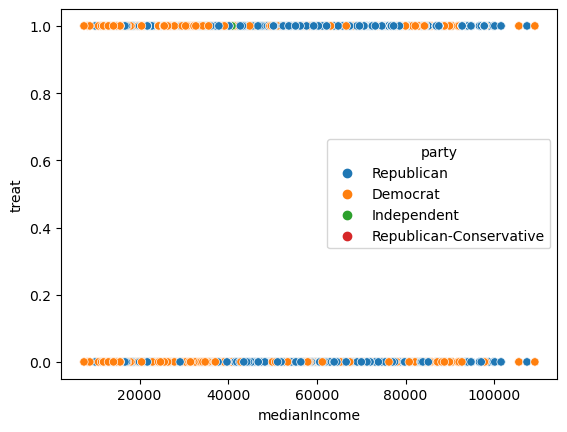

In [12]:
sns.scatterplot(x= 'medianIncome', y= 'treat', data= merge, hue = merge['party'])

In [31]:
stats.pearsonr(merge['medianIncome'], merge['treat'])

ValueError: array must not contain infs or NaNs

<AxesSubplot:title={'center':'Extreme Candiate Success Given Median Income'}, xlabel='medianIncome', ylabel='treat'>

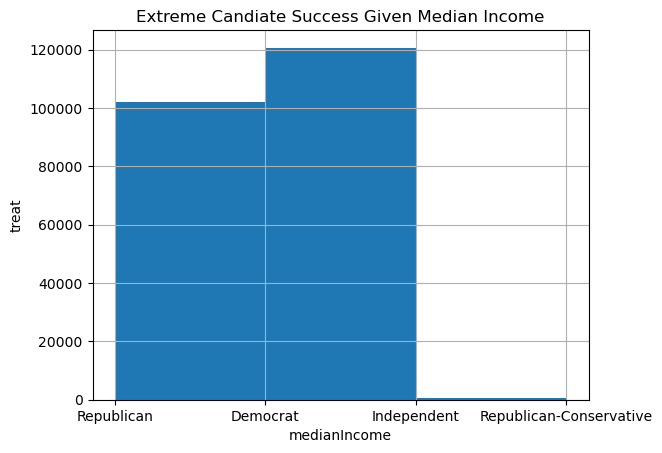

In [13]:
mergehist=merge['party'].hist(bins=3)
plt.title("Extreme Candiate Success Given Median Income") 
plt.xlabel("medianIncome")
plt.ylabel("treat")

mergehist

<AxesSubplot:xlabel='medianIncome', ylabel='treat'>

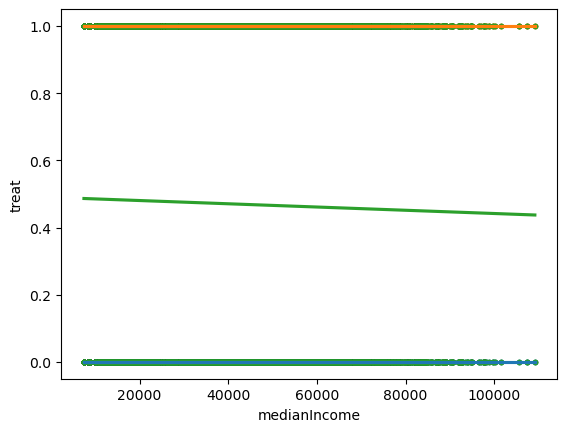

In [15]:
within20below = merge[(merge['margin'] <= 0.2) & (merge['rv'] < 0)]
within20above = merge[(merge['margin'] <= 0.2) & (merge['rv'] > 0)]
within20below, within20above


sns.regplot(x='medianIncome', y='treat', data=within20below, marker=".", ci=None, scatter_kws={'alpha':0.3})
sns.regplot(x='medianIncome', y='treat', data=within20above, marker=".", ci=None, scatter_kws={'alpha':0.3})
sns.regplot(x='medianIncome', y='treat', data=merge, marker=".", ci=None, scatter_kws={'alpha':0.3})

In [18]:
smf.ols('treat ~ medianIncome', data= merge).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  treat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     57.63
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.18e-14
Time:                        19:10:40   Log-Likelihood:            -1.5199e+05
No. Observations:              209909   AIC:                         3.040e+05
Df Residuals:                  209907   BIC:                         3.040e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4900      0.003    188.121      0.000       0.485       0.495
medianIncome -4.827e-07   6.36e-08     -7.591      0.000   -6.07e-07   -3.58e-07
==============================================================================
Omnibus:                   721022.462   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34947.938
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       1.014   Cond. No.                     9.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

not a steep slope, yet still shows slight negative relationship between median income and whether a extreme candidate's performance in an election

In [22]:
smf.ols('treat ~ under10k + party + under10k:party', data= merge).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  treat   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     61.37
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.19e-76
Time:                        19:18:50   Log-Likelihood:            -1.6009e+05
No. Observations:              220934   AIC:                         3.202e+05
Df Residuals:                  220927   BIC:                         3.203e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.4644      0.003    153.832      0.000       0.458       0.470
party[T.Independent]                         -0.1629      0.067     -2.441      0.015      -0.294      -0.032
party[T.Republican]                          -0.0258      0.004     -5.822      0.000      -0.035      -0.017
party[T.Republican-Conservative]              0.0138      0.028      0.495      0.621      -0.041       0.068
under10k                                      0.0032      0.000     10.806      0.000       0.003       0.004
under10k:party[T.Independent]                 0.0172      0.007      2.406      0.016       0.003       0.031
under10k:party[T.Republican]                  0.0025      0.000      4.910      0.000       0.001       0.003
under10k:party[T.Republican-Conservative]     0.0236      0.048      0.495      0.621      -0.070       0.117
==============================================================================
Omnibus:                   756771.323   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36580.434
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                       1.010   Cond. No.                     3.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.17e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
smf.ols('treat ~ under10k + prcntWhite + under10k:prcntWhite ', data= merge).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  treat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.71
Date:                Thu, 04 May 2023   Prob (F-statistic):           3.29e-10
Time:                        19:23:17   Log-Likelihood:            -1.5200e+05
No. Observations:              209909   AIC:                         3.040e+05
Df Residuals:                  209905   BIC:                         3.040e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4770      0.008     59.759      0.000       0.461       0.493
under10k               -0.0004      0.001     -0.583      0.560      -0.002       0.001
prcntWhite              0.0001      0.000      1.391      0.164   -5.84e-05       0.000
under10k:prcntWhite -2.453e-05   9.37e-06     -2.617      0.009   -4.29e-05   -6.15e-06
==============================================================================
Omnibus:                   720939.520   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34954.931
Skew:                           0.112   Prob(JB):                         0.00
Kurtosis:                       1.013   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Step 4: Conclusion

What did you learn form this exercise? How would you extend or modify your analysis if you had more time/data available?  (5-10 sentences)

In [ ]:
pick a data set that is not so detailed, does not include so many factors 